In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
loan=pd.read_csv(r"C:\Users\HP\Downloads\loan_data.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0


In [6]:
loan.shape

(39717, 55)

# MISSING VALUES

In [7]:
Missing_values=loan.isnull().sum()
Missing_values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       6.19
emp_length                      2.71
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
loan_status                     0.00
pymnt_plan                      0.00
url                             0.00
desc                           32.59
purpose                         0.00
title                           0.03
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
inq_last_6mths                  0.00
mths_since_last_delinq         64.66
m

In [8]:
#The thresh parameter in pandas' dropna() is only used to evaluate non-null (non-NA) values in rows or columns. 
thresh=len(loan)*0.7
thresh
loan.dropna(thresh=thresh,axis=1,inplace=True)

In [9]:
loan = loan.drop(['id','member_id','pymnt_plan','emp_title','title','url','zip_code','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)

In [10]:
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')/100

In [11]:
loan.revol_util.describe()

count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

In [12]:
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].mean())
loan.revol_util

0        0.837
1        0.094
2        0.985
3        0.210
4        0.539
         ...  
39712    0.131
39713    0.269
39714    0.194
39715    0.007
39716    0.515
Name: revol_util, Length: 39717, dtype: float64

In [13]:
loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [14]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype('category')
loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [15]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(0)

In [16]:
loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [17]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [18]:
#Print the unique values of emp_length
print(loan.emp_length.unique())
# Check the number of loans by emp_length
print (loan.emp_length.value_counts())

# Replace the 'n/a' with '10+ years'(mode of emp_length column)
loan['emp_length'] = loan.emp_length.str.replace('< 1 year','0')
loan['emp_length'] = loan.emp_length.str.replace(' years','')
loan['emp_length'] = loan.emp_length.str.replace(' year','')
loan['emp_length'] = loan.emp_length.str.replace('+','')
loan['emp_length'] = loan.emp_length.str.replace('n/a','10')
# Convert datatype
loan['emp_length'] = pd.to_numeric(loan['emp_length'])
loan['emp_length']

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64

In [19]:
#Use mean for continuous, normally distributed data.
#Use median for skewed data or when outliers are present.
#Use mode for categorical or ordinal data, or when the most frequent value is the best assumption for missing data.

In [20]:
loan['roi'] = round(((loan['total_pymnt'] - loan['collection_recovery_fee']) / loan['funded_amnt']) - 1, 2)
loan['roi']

0        0.17
1       -0.60
2        0.25
3        0.22
4        0.17
         ... 
39712    0.13
39713    0.17
39714    0.05
39715    0.03
39716    0.23
Name: roi, Length: 39717, dtype: float64

In [21]:
loan = loan[loan['loan_status']!='Current']
loan.shape

(38577, 34)

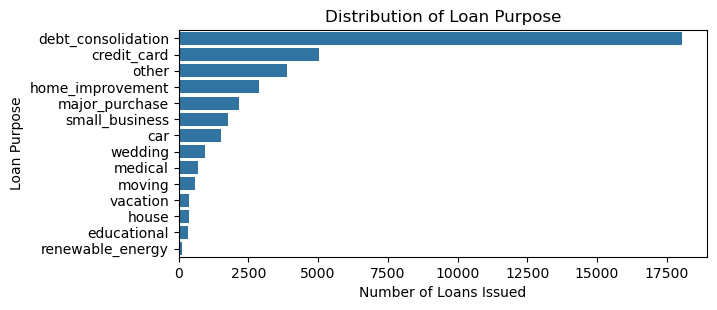

In [22]:
plt.figure(figsize=(15,10))

# Sort loan purposes by the number of loans issued
sorted_purposes = loan['purpose'].value_counts().index

# Distribution of Loans by Purpose (Horizontal Bar Graph)
plt.subplot(3,2,1)
sns.countplot(y='purpose', data=loan, order=sorted_purposes)
plt.title('Distribution of Loan Purpose')
plt.xlabel("Number of Loans Issued")
plt.ylabel("Loan Purpose")
plt.show()


# Univariate Analysis on Unordered Categorical Variables

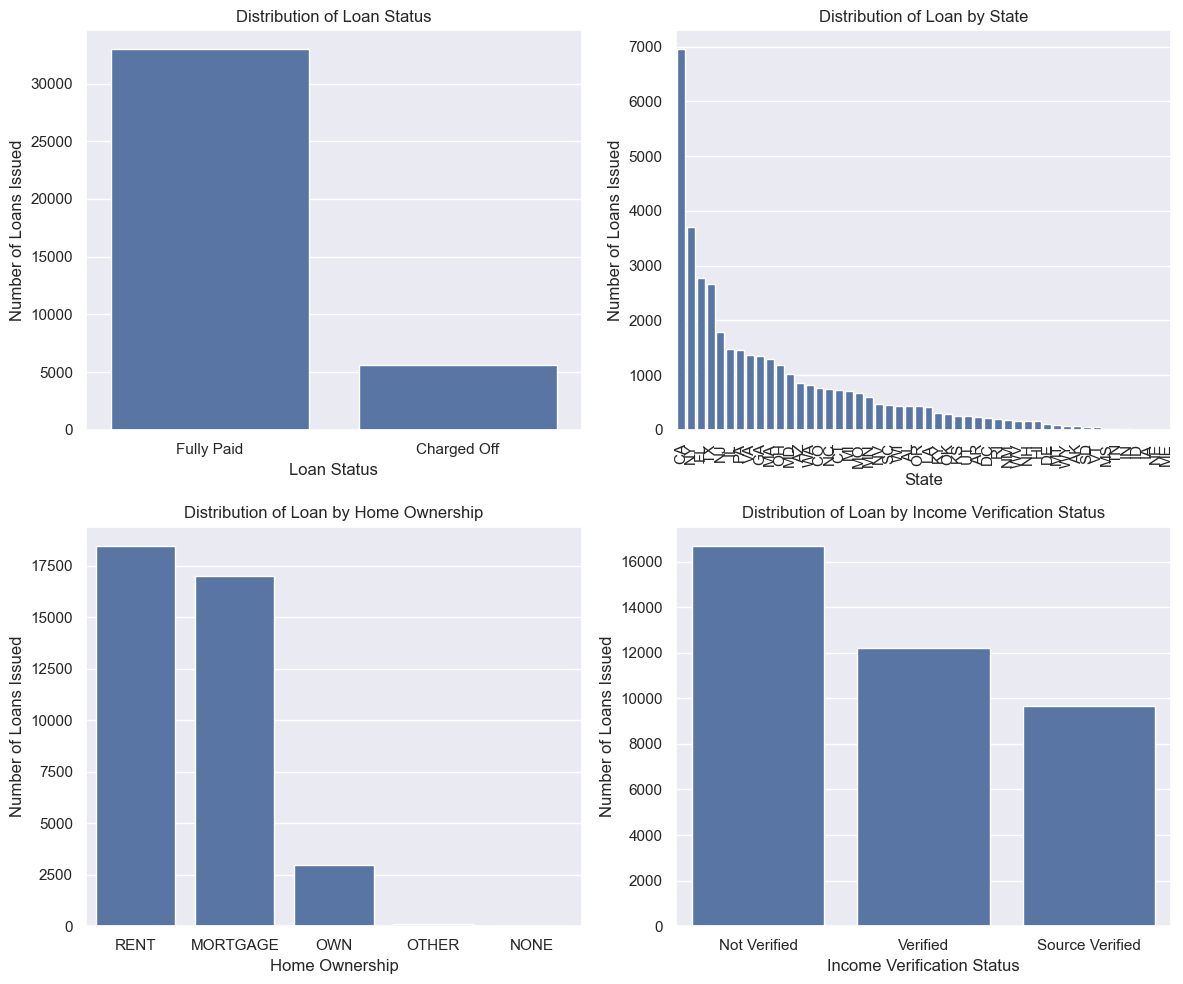

In [40]:
plt.figure(figsize=(12, 10))

# Figure 1 setup
plt.figure(1)

# Distribution of Loans by Status
plt.subplot(2, 2, 1)
sns.countplot(
    x='loan_status',
    data=loan,
    order=loan['loan_status'].value_counts().index
)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans Issued")

# Distribution of Loans by State
plt.subplot(2, 2, 2)
sns.countplot(
    x='addr_state',
    data=loan,
    order=loan['addr_state'].value_counts().index
)
plt.title('Distribution of Loan by State')
plt.xlabel("State")
plt.ylabel("Number of Loans Issued")
plt.xticks(rotation=90)  # To rotate axis text

# Distribution of Loans by Home Ownership
plt.subplot(2, 2, 3)
sns.countplot(
    x='home_ownership',
    data=loan,
    order=loan['home_ownership'].value_counts().index
)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans Issued")

# Distribution of Loans by Income Verification Status
plt.subplot(2, 2, 4)
sns.countplot(
    x='verification_status',
    data=loan,
    order=loan['verification_status'].value_counts().index
)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans Issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

# Observations

- A majority of loans are marked as "Fully Paid" compared to a smaller proportion that is "Charged Off".
  - This indicates that most borrowers fulfill their loan obligations.

- The most common purposes for taking loans are:
  - **Debt Consolidation**
  - **Credit Card**
  - **Home Improvement**
  - Categories like **Small Business** and **Medical Expenses** are less common.

- There is a noticeable variation in the number of loans issued across states.
  - States with higher population or economic activity likely account for the higher loan counts (e.g., **California**, **Texas**, **New York**).

- Borrowers with "Mortgage" are the largest group, followed by those who "Rent".
  - A smaller proportion of loans are associated with borrowers who "Own" their homes.

- Most loans are issued to borrowers with:
  - **Verified** or **Source Verified** income.
  - A smaller share of loans is issued to those with **Not Verified** income status, reflecting tighter lending policies for unverified income.


# Univariate Analysis on Ordered Categorical Variables

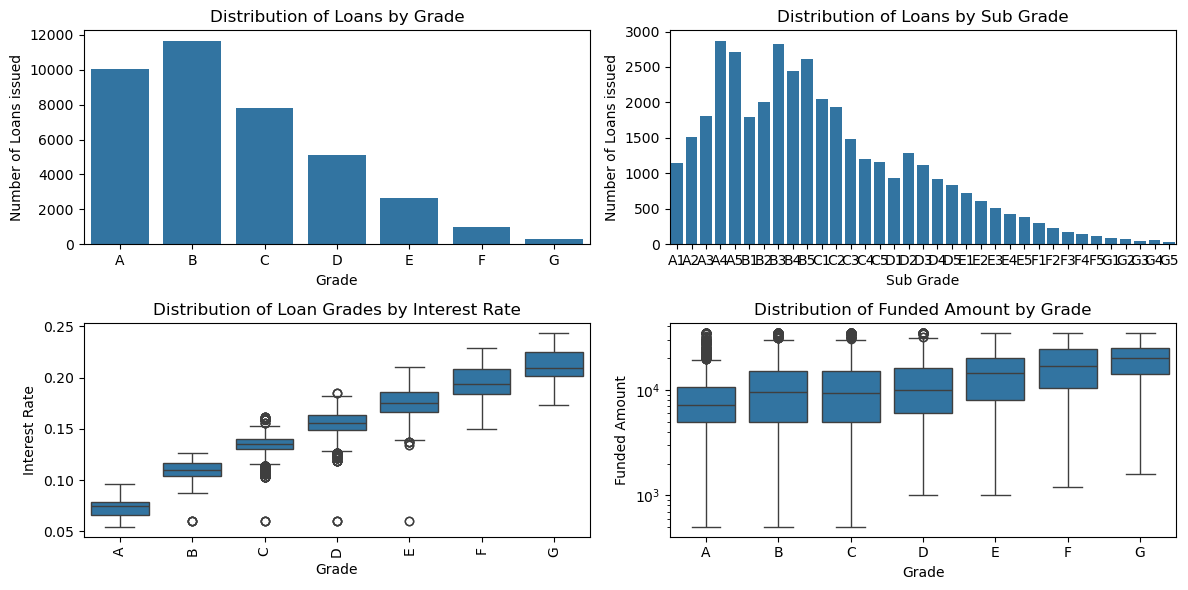

In [24]:
# Make sure 'int_rate' is treated as a string before applying .str
loan['int_rate'] = loan['int_rate'].astype(str).str.rstrip('%').astype('float') / 100

# Create the figure for subplots
plt.figure(figsize=(12,6))

# Sorted distribution of loans by grade
plt.subplot(2,2,1)  # Correct usage of subplot
sns.countplot(x="grade", data=loan, order=sorted(loan['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

# Sorted distribution of loans by sub-grade
plt.subplot(2,2,2)  # Correct usage of subplot
sns.countplot(x="sub_grade", data=loan, order=sorted(loan['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# Sorted distribution of loan grades by interest rate
plt.subplot(2,2,3)  # Correct usage of subplot
sns.boxplot(x="grade", y="int_rate", data=loan, order=sorted(loan['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.xticks(rotation=90)

# Sorted distribution of funded amount by grade (using log scale)
plt.subplot(2,2,4)  # Correct usage of subplot
sns.boxplot(x="grade", y="funded_amnt", data=loan, order=sorted(loan['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Display the plots
plt.show()


### Loan Distribution Analysis

**Loan Distribution by Grade**:  
The majority of loans are issued to applicants in grades A, B, and C, with the least number of loans being given to those in grade G. This suggests that individuals with better credit scores (A, B, C grades) are more likely to be approved for loans, indicating a preference for low-risk applicants.

**Sub-grade Insights**:  
Among the sub-grades, A4 and B3 have the highest number of loans, indicating that these specific sub-grades, which may represent the more reliable applicants within the A and B categories, are favored by lenders.

**Interest Rate Trends**:  
Applicants in grades A, B, and C are offered lower interest rates, while those in grades E, F, and G face higher rates. This pattern reflects the correlation between creditworthiness and interest rates—better credit scores result in lower rates due to reduced risk for lenders.

**Funded Amounts by Grade**:  
Higher loan amounts are typically granted to applicants in grades A, B, C, and D, as these applicants are perceived as lower risk due to their better credit histories. In contrast, lower-funded amounts are more common for applicants in grades E, F, and G, likely due to the higher risk associated with these grades.


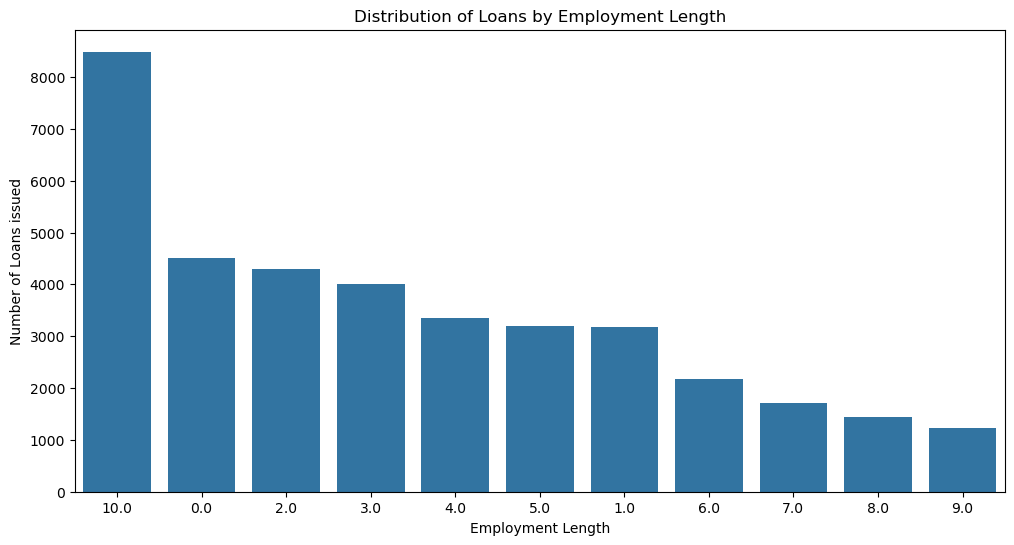

In [25]:
plt.figure(figsize=(12, 6))

# Sorting by count of loans
sns.countplot(x='emp_length', data=loan, order=loan['emp_length'].value_counts().index)

plt.title('Distribution of Loans by Employment Length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()


# Univariate Analysis on Quantitative Variables

In [26]:
# Let's print descriptive data summary for all numerical columns
print (loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','annual_inc', 'dti', 'delinq_2yrs','emp_length', 'roi']].describe())
print ("\n")
print (loan[['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt', 'application_type','pub_rec_bankruptcies']].describe())

          loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123      0.119322   
std     7348.441646   7090.306027      7022.720644      0.036913   
min      500.000000    500.000000         0.000000      0.054200   
25%     5300.000000   5200.000000      5000.000000      0.089400   
50%     9600.000000   9550.000000      8733.440000      0.117100   
75%    15000.000000  15000.000000     14000.000000      0.143800   
max    35000.000000  35000.000000     35000.000000      0.244000   

        installment    annual_inc           dti   delinq_2yrs    emp_length  \
count  38577.000000  3.857700e+04  38577.000000  38577.000000  37544.000000   
mean     322.466318  6.877797e+04     13.272727      0.146668      4.940976   
std      208.639215  6.421868e+04      6.673044      0.492271      3.557082   
min       15.690000  4.000000e+03      0.000000      0.000000      0.00

In [27]:
loan['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

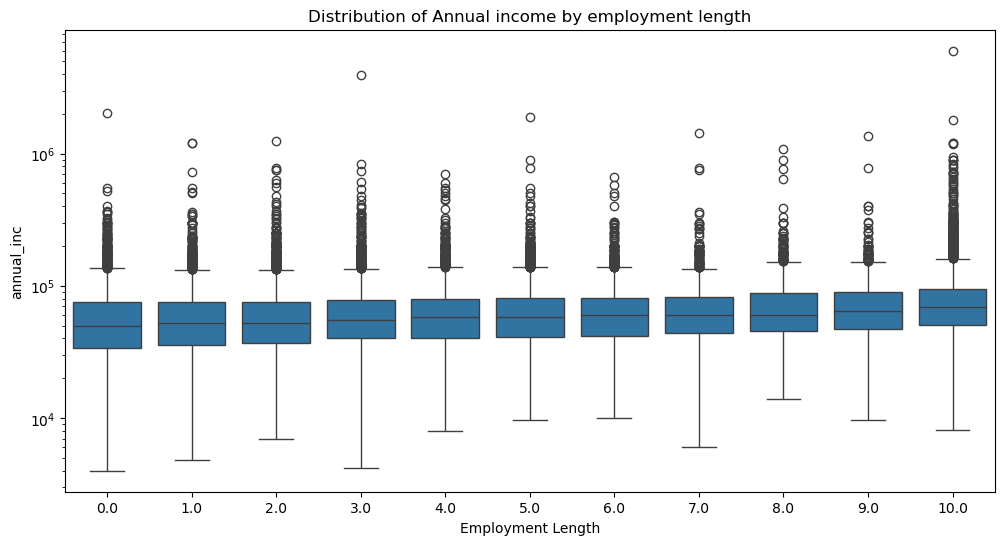

In [28]:
# Distribution of Annual income by employment length
plt.figure(figsize=(12,6))
sns.boxplot(x="emp_length", y="annual_inc" , data=loan)
plt.title('Distribution of Annual income by employment length')
plt.xlabel("Employment Length")
plt.ylabel("annual_inc")
plt.yscale('log')
plt.show()

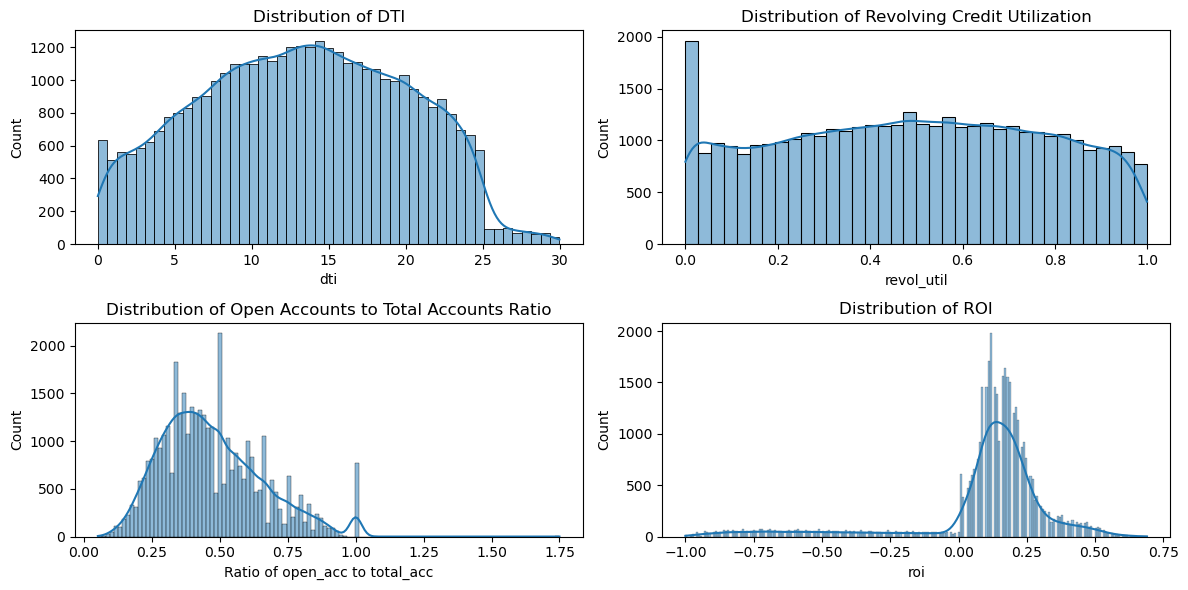

In [29]:
# Set up the figure
plt.figure(figsize=(12,6))

# Frequency distribution of DTI
plt.subplot(2,2,1)
sns.histplot(loan["dti"], kde=True)
plt.title("Distribution of DTI")

# Frequency distribution of revolving credit utilization
plt.subplot(2,2,2)
sns.histplot(loan["revol_util"], kde=True)
plt.title("Distribution of Revolving Credit Utilization")

# Frequency distribution of the ratio of open_acc to total_acc
plt.subplot(2,2,3)
sns.histplot(loan["open_acc"]/loan["total_acc"], kde=True)
plt.title("Distribution of Open Accounts to Total Accounts Ratio")
plt.xlabel("Ratio of open_acc to total_acc")

# Frequency distribution of ROI
plt.subplot(2,2,4)
sns.histplot(loan["roi"], kde=True)
plt.title("Distribution of ROI")

# Adjust spacing between subplots for better readability
plt.tight_layout()
plt.show()


### Observations

1. **Debt-to-Income (DTI) Ratio**:
   - The histogram shows a roughly normal distribution with a peak around 15, indicating that most customers have a DTI ratio near this value.

2. **Revolving Utilization**:
   - The distribution is heavily right-skewed, with many values concentrated near zero and fewer towards higher utilization rates. This suggests that most individuals are using a small portion of their available credit.

3. **Ratio of Open to Total Accounts**:
   - Most values are concentrated between 0.25 and 0.75, with a peak around 0.5. This indicates a balanced utilization of open accounts relative to the total accounts.

4. **Return on Investment (ROI)**:
   - The ROI distribution is concentrated near 0, with a slightly longer tail extending towards positive values. This suggests that most values are close to neutral, with some positive outliers.


# Bivariate Analysis on Continuous Variables


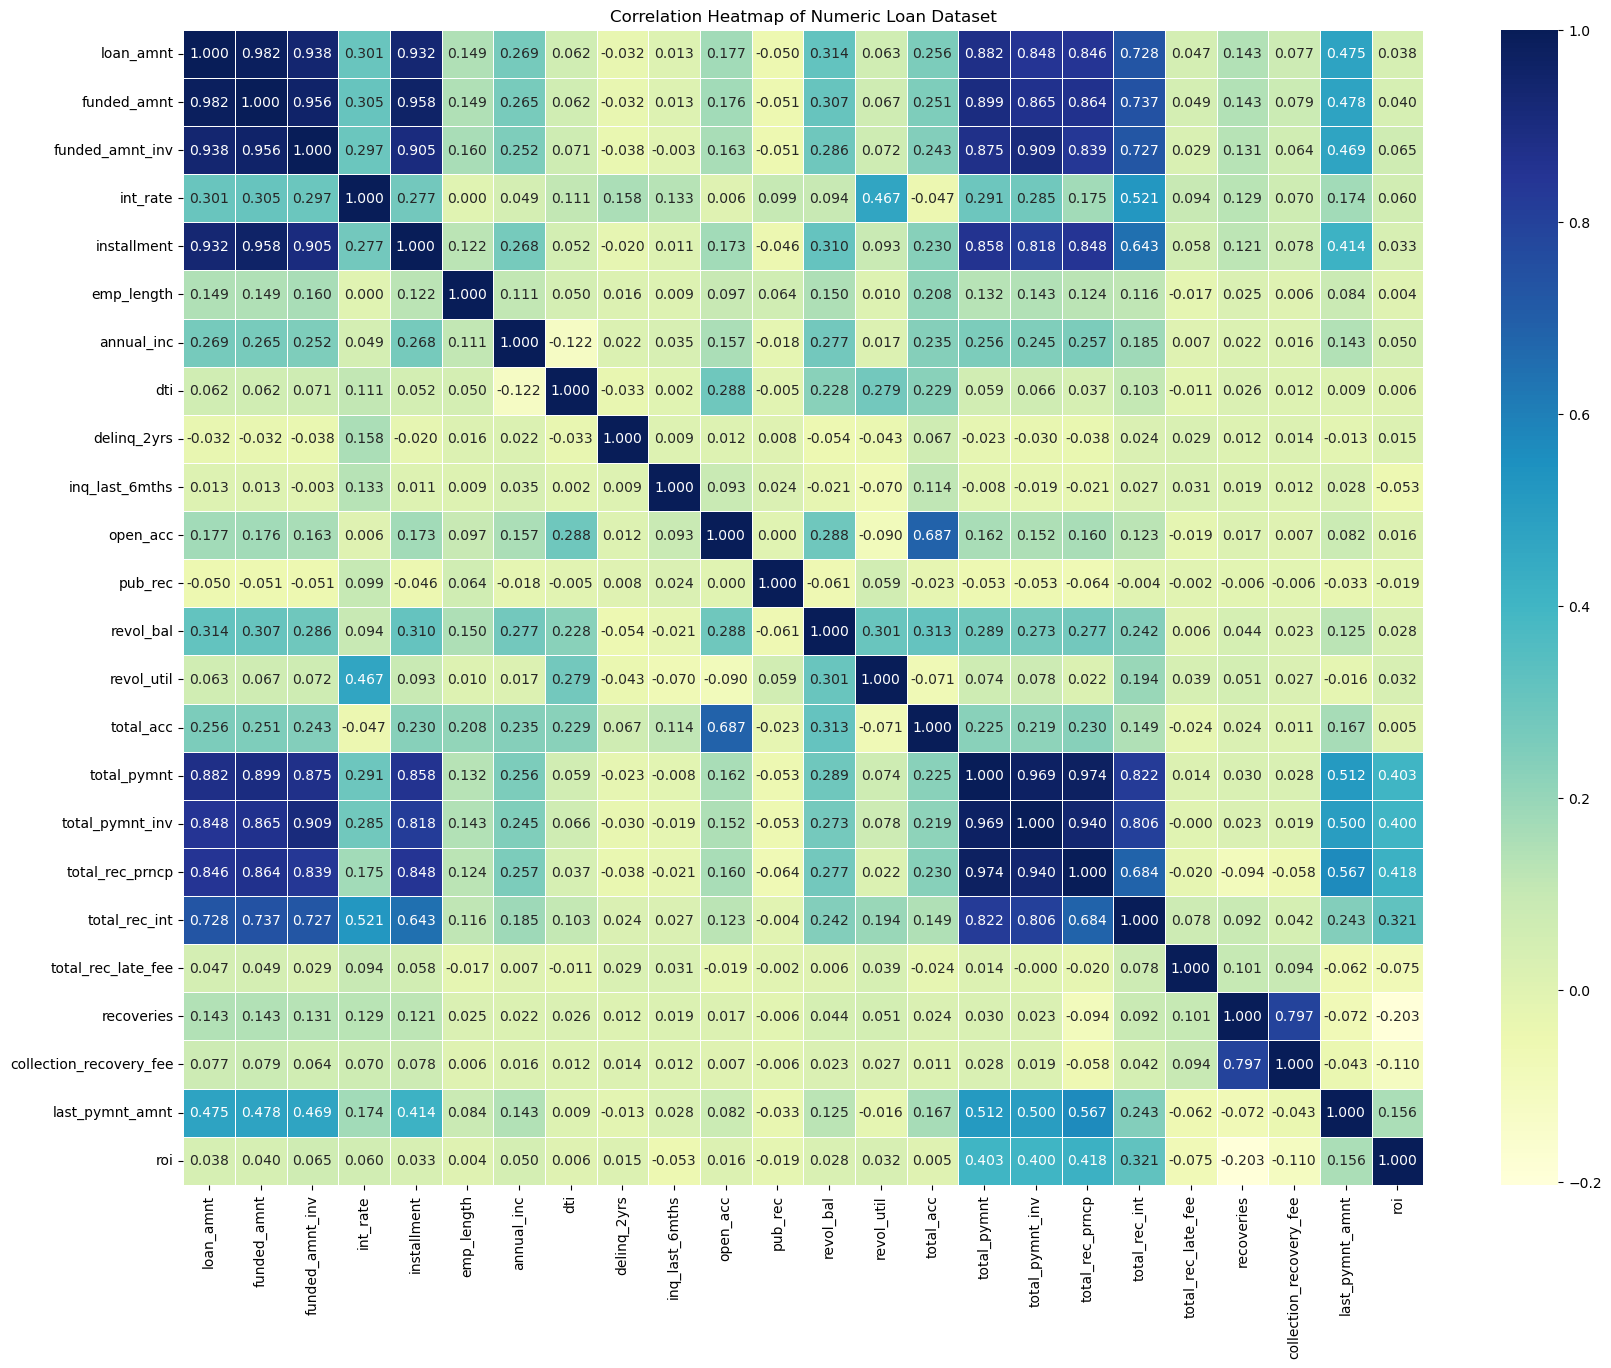

In [30]:
# Select only numeric columns for correlation calculation (float and int types)
loan_numeric = loan.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns
cor = loan_numeric.corr()

# Round the correlation values for better readability
cor_rounded = round(cor, 3)

# Set up the figure size
plt.figure(figsize=(20, 15))

# Create the heatmap with annotations
sns.heatmap(cor_rounded, cmap='YlGnBu', annot=True, fmt='0.3f', linewidths=0.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap of Numeric Loan Dataset')

# Display the heatmap
plt.show()


## Observations from the Correlation Plot

1. **No Strong Negative Correlations**:
   - The plot shows no highly negative correlations between columns, which means there are no variables that show strong inverse relationships. This suggests that the dataset does not have variables that directly oppose each other in their relationship.

2. **Highly Correlated Columns**:
   - A group of columns in the top-left and middle-left block exhibit strong correlations with each other. This may indicate that these variables share similar trends or patterns in the data, which could point to underlying factors that influence them.
   - 
3. **Correlation between `revol_util` (Revolving Utilization) and `interest rate (int_rate)`**:
   - The correlation value of **0.47** between `revol_util` and `int_rate` indicates a moderate positive relationship. This suggests that higher revolving credit utilization tends to be associated with higher interest rates, possibly due to the perceived risk of applicants with higher utilization.

4. **Low Correlation between `Annual Income` and `DTI` (Debt-to-Income Ratio) with Other Variables**:
   - The plot shows that **Annual Income** and **DTI** have little correlation with other variables. This suggests that these financial metrics are somewhat independent of the other factors in the dataset, or their relationships with other columns are weak.


<Figure size 1200x600 with 0 Axes>

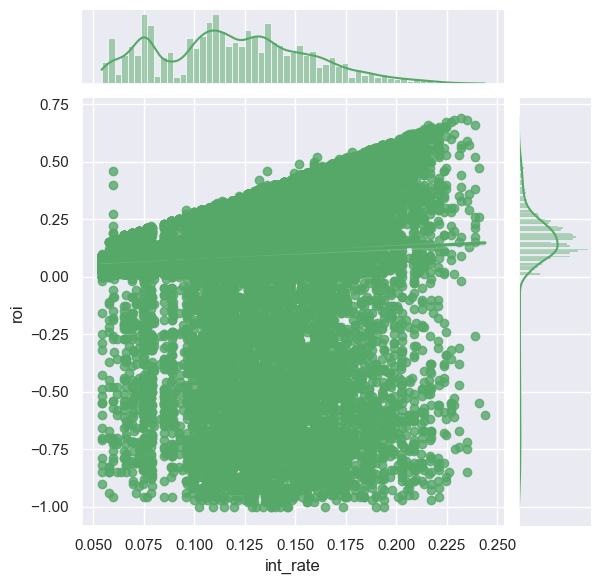

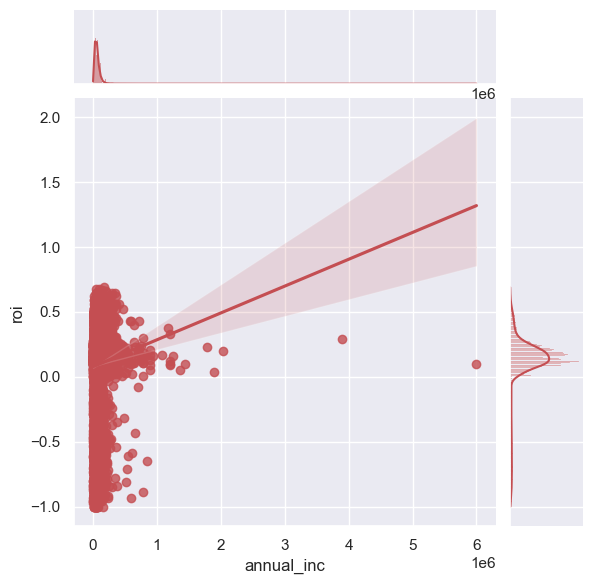

In [31]:
# ROI vs Interest Rate and Annual Income
plt.figure(figsize=(12,6))

sns.set(style="darkgrid", color_codes=True)

sns.jointplot(x="int_rate", y="roi", data=loan, kind="reg", color="g")

sns.jointplot(x="annual_inc", y="roi", data=loan, kind="reg", color="r")

plt.show()

## Observations from the Analysis:

1. **Correlation between Interest Rates and ROI**:
   - There was a positive correlation between **interest rates** and **ROI** (Return on Investment) for borrowers who paid their loans. This suggests that higher interest rates were associated with a higher return for those who repaid their loans.
   - However, for borrowers who did not pay their loans, the **ROI** was negative and showed no correlation with **interest rates**. This indicates that for non-payers, interest rates did not significantly affect their ROI, possibly due to defaults or the lack of repayment.

2. **Correlation between Income and ROI**:
   - Borrowers with **higher income** generally had a **positive ROI**, which implies that higher income was associated with better financial performance or profitability for those who repaid their loans.
   - On the other hand, borrowers with **lower income** had a **negative ROI**, suggesting that lower-income borrowers were more likely to experience negative financial outcomes or defaults, leading to lower profitability for lenders.


<Figure size 2000x1500 with 0 Axes>

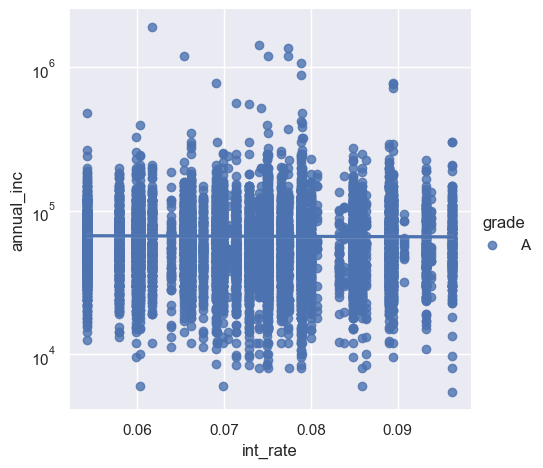

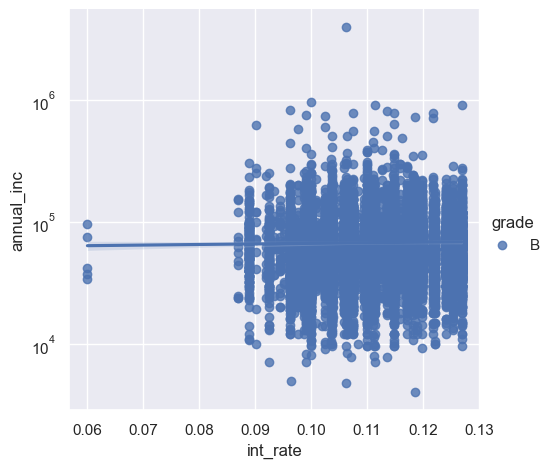

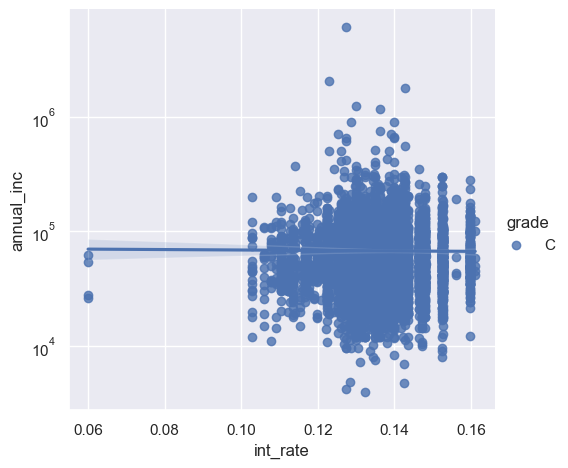

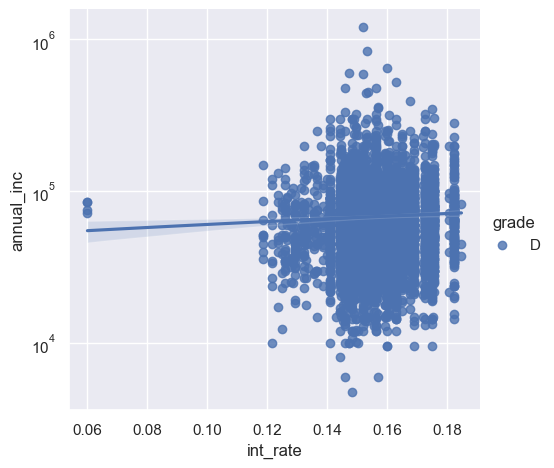

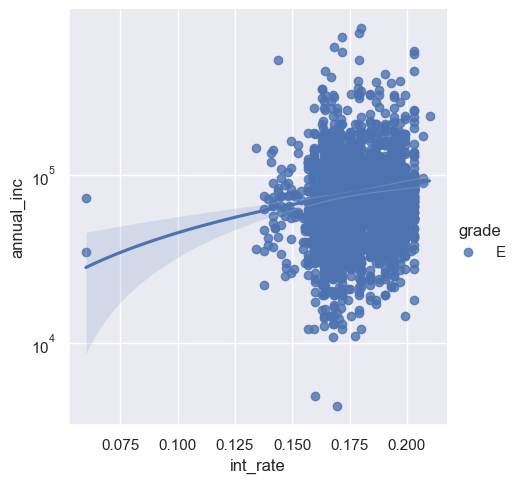

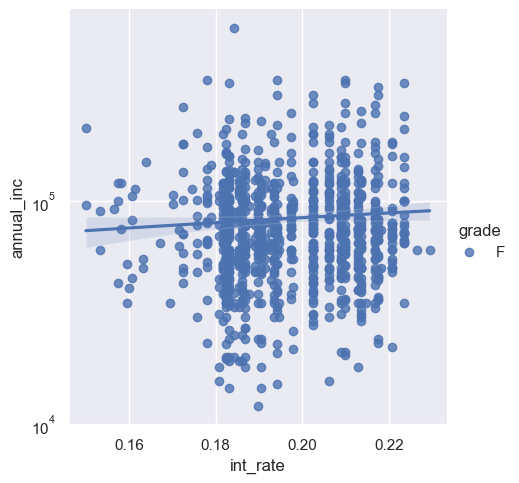

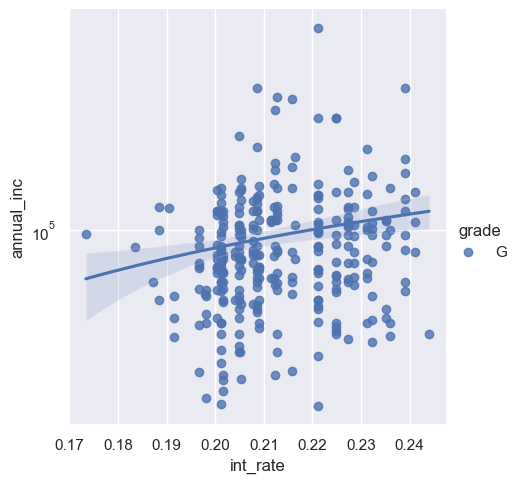

In [32]:
# Annual Income Vs Interest Rate distribution by each grade
plt.figure(figsize=(20,15))

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=loan[loan['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()

## Observations from the Interest Rate Distribution by Grade:

1. **Grade A**:
   - Borrowers in **Grade A** typically have interest rates between **5-10%**. This reflects that borrowers with the best credit scores (Grade A) tend to receive lower interest rates, as they are seen as less risky.

2. **Grade B**:
   - Borrowers in **Grade B** have interest rates between **8-13%**, with a few borrowers having interest rates near **6%**. This suggests that while most of the borrowers are offered rates slightly higher than those in Grade A, some still receive relatively low rates, possibly due to other favorable factors like credit history.

3. **Grade C**:
   - Borrowers in **Grade C** have interest rates between **10-16%**, but there are a few with rates near **6%**. This could indicate that some Grade C borrowers still have relatively lower risk factors or exceptional credit profiles, leading to lower-than-expected rates.

4. **Grade D**:
   - Borrowers in **Grade D** typically have interest rates between **12-18%**, with a few having rates near **6%**. These are considered higher-risk borrowers, but some may still be offered lower rates due to specific circumstances.

5. **Grade E**:
   - Borrowers in **Grade E** have interest rates ranging from **14-20%**, but, similar to Grade D, there are a few borrowers with interest rates near **6%**. Again, some borrowers in this group may have other factors improving their creditworthiness.

6. **Grade F**:
   - Borrowers in **Grade F** have interest rates between **15-23%**. These borrowers have a higher risk profile, leading to higher interest rates.

7. **Grade G**:
   - Borrowers in **Grade G** have interest rates between **17-24%**, reflecting the highest-risk borrowers, who are typically offered the highest interest rates.

### **Key Insights**:
- It is evident that the **interest rate range** increases from **Grade A to Grade G**. As the borrower’s credit grade decreases, their interest rates increase to compensate for the higher perceived risk.
- Interestingly, there are **a few borrowers with interest rates near 6%** in **Grades B, C, D, and E**. These could be borrowers with specific favorable credit characteristics, despite their overall grade.


<Figure size 2000x1500 with 0 Axes>

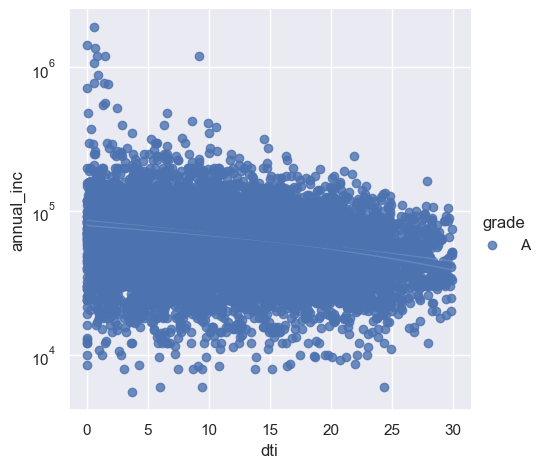

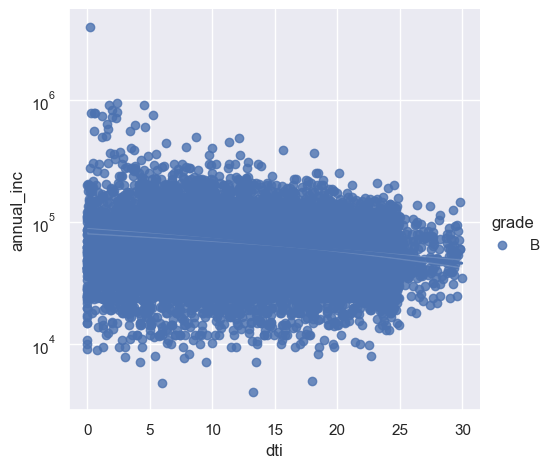

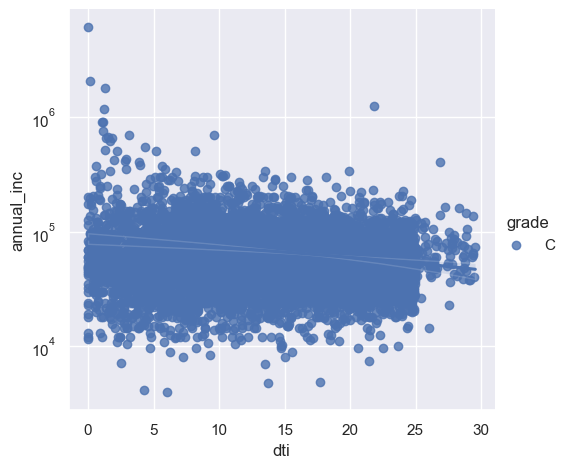

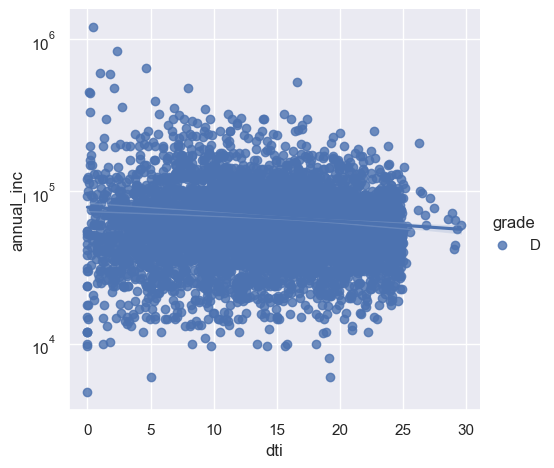

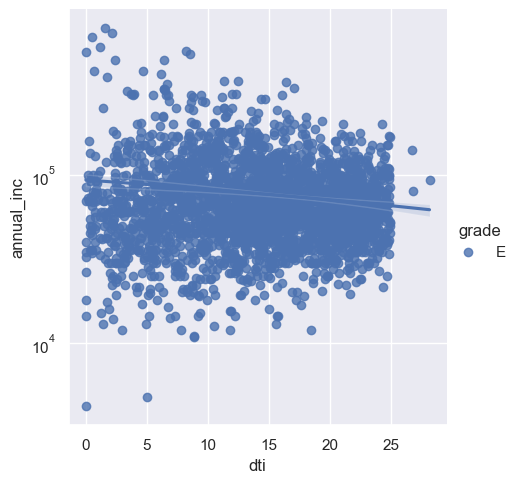

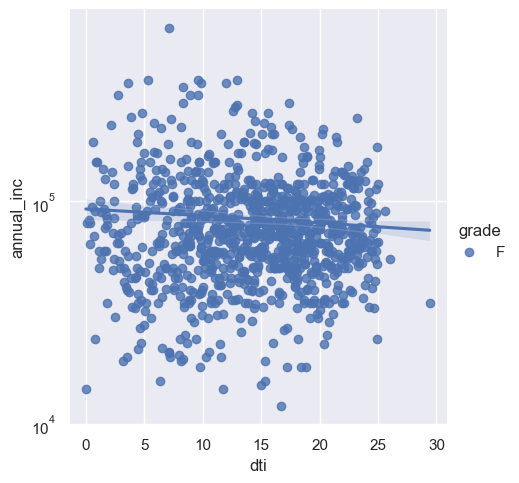

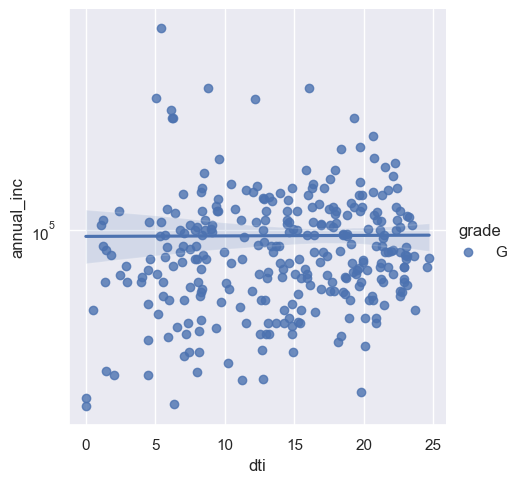

In [33]:
# Annual Income Vs DTI distribution by each grade
plt.figure(figsize=(20,15))

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=loan[loan['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()

## Observations from DTI Distribution by Grade:

1. **Grade A, B, C**:
   - It appears that in **Grade A**, **Grade B**, and **Grade C**, the **DTI (Debt-to-Income ratio)** is spread across a range from **0-30**. This indicates that borrowers in these grades show a varied ability to manage debt, but most still have manageable debt-to-income ratios.

2. **Grade D, E**:
   - There are fewer borrowers in **Grade D** and **Grade E** with **DTI values between 25-30**. This could suggest that higher DTI ratios, indicative of a higher amount of debt relative to income, are less common in these grades, perhaps due to the increased risk associated with higher DTI.

3. **Grade G**:
   - **Grade G** has the maximum **DTI value of 25**. This suggests that borrowers in Grade G tend to have higher debt-to-income ratios, which aligns with the higher perceived risk and the higher interest rates associated with this grade.

### **Key Insights**:
- There appears to be **no strict DTI range constraint** between grades, unlike **interest rates**, which clearly show a progressive increase from one grade to the next.
- A **lower DTI** suggests better debt management, which is why lenders tend to prefer borrowers with a lower DTI, as it indicates a lower risk of default. This aligns with the observation that higher-grade borrowers (A, B, C) have a wider spread of DTI values, but generally lower debt-to-income ratios.


# Loan Defaulters Analysis


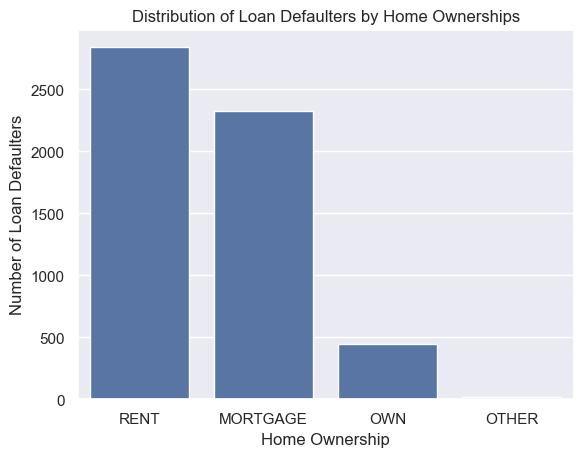

home_ownership
MORTGAGE    2327
OTHER         18
OWN          443
RENT        2839
Name: home_ownership, dtype: int64


In [34]:
# Count the number of loan defaulters by home ownership
loan_defaulters = loan[loan['loan_status'] == 'Charged Off']
home_ownership_counts = loan_defaulters['home_ownership'].value_counts().index

# Plot the sorted distribution of loan defaulters by home ownership
sns.countplot(x='home_ownership', data=loan_defaulters, order=home_ownership_counts)
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loan Defaulters")
plt.show()

# Print the count of loan defaulters by home ownership
print(loan_defaulters.groupby(['home_ownership'])['home_ownership'].count())


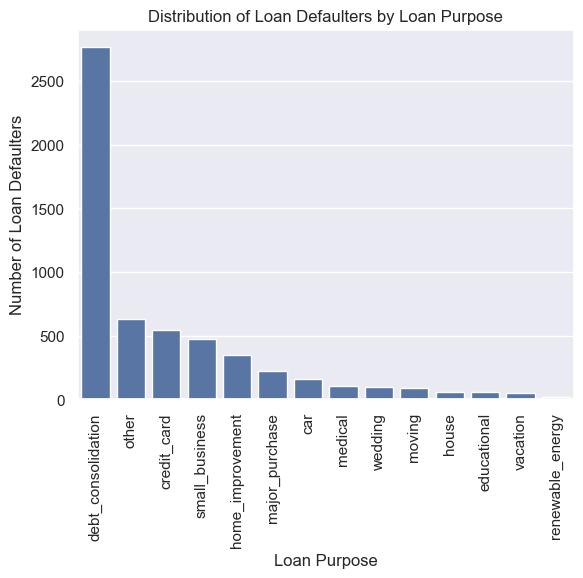

purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: purpose, dtype: int64


In [35]:
# Count the number of loan defaulters by loan purpose
loan_defaulters_by_purpose = loan[loan['loan_status'] == 'Charged Off']
sorted_purposes = loan_defaulters_by_purpose['purpose'].value_counts().index

# Plot the sorted distribution of loan defaulters by loan purpose
sns.countplot(x='purpose', data=loan_defaulters_by_purpose, order=sorted_purposes)
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Loan Purpose")
plt.ylabel("Number of Loan Defaulters")

# To rotate axis text
plt.xticks(rotation=90)
plt.show()

# Print the count of loan defaulters by loan purpose
print(loan_defaulters_by_purpose.groupby(['purpose'])['purpose'].count())


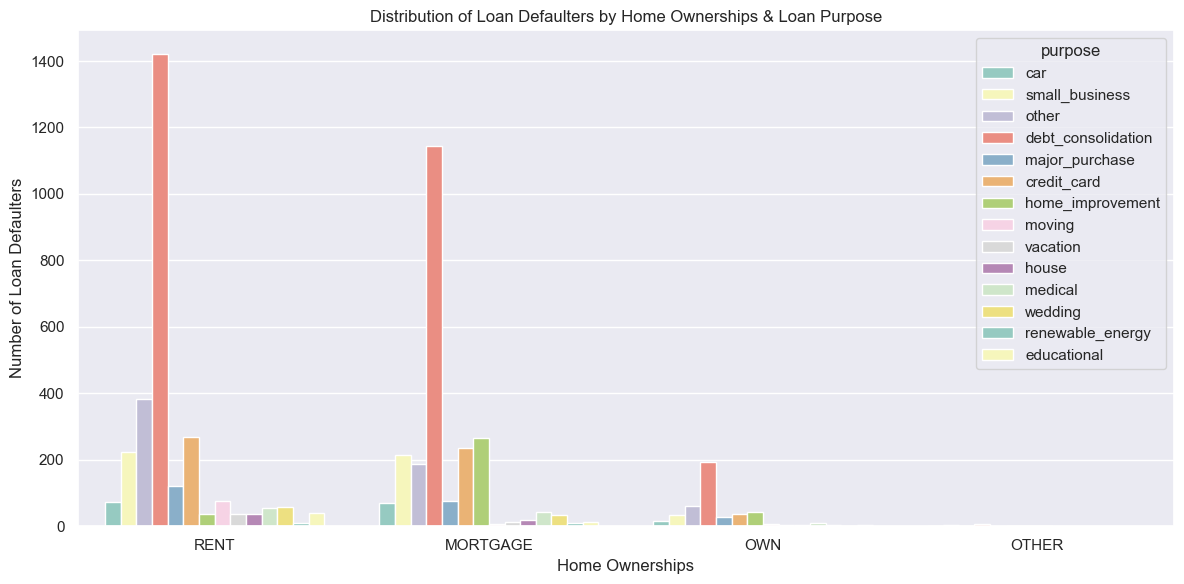

In [36]:
# Count the number of loan defaulters by home ownership and loan purpose
loan_defaulters = loan[loan['loan_status'] == 'Charged Off']
home_ownership_purpose_counts = loan_defaulters.groupby(['home_ownership', 'purpose']).size().reset_index(name='counts')

# Sort the values by the counts to get the order
home_ownership_purpose_counts_sorted = home_ownership_purpose_counts.sort_values(by='counts', ascending=False)

# Get the sorted home ownership categories and loan purposes
sorted_home_ownership = home_ownership_purpose_counts_sorted['home_ownership'].unique()
sorted_purpose = home_ownership_purpose_counts_sorted['purpose'].unique()

# Plot the sorted distribution of loan defaulters by home ownership and loan purpose
plt.figure(figsize=(12, 6))
sns.countplot(x='home_ownership', hue='purpose', data=loan_defaulters, palette="Set3", order=sorted_home_ownership)

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

# Print the sorted counts of loan defaulters by home ownership and loan


## Observations from Distribution of Loan Defaulters by Loan Purpose and Home Ownership:

1. **From the RENT Category**:
   - In the **RENT** category, the most loan defaulters are from the following purposes:
     - **Debt Consolidation**
     - **Other**
     - **Credit Card**
     - **Small Business**

2. **From the MORTGAGE Category**:
   - In the **MORTGAGE** category, the most loan defaulters are from the following purposes:
     - **Debt Consolidation**
     - **Home Improvement**
     - **Credit Card**
     - **Small Business**

3. **Key Insight**:
   - Overall, it is evident that **Debt Consolidation**, **Credit Card**, and **Small Business** loans should be approached with caution, especially when the borrowers **do not own a home**. These purposes have a higher likelihood of default in the **RENT** category, which suggests that individuals without home ownership may be at greater risk of defaulting on loans related to these purposes.


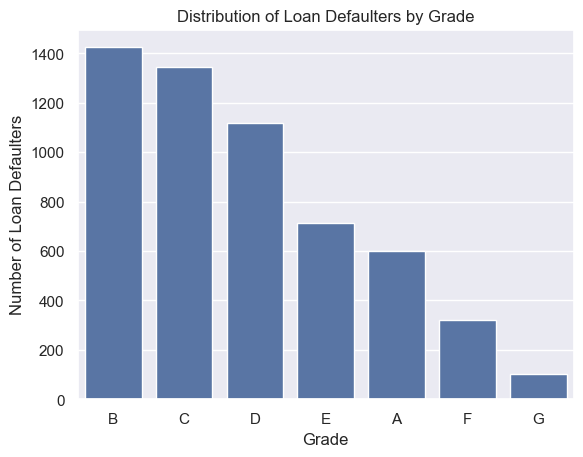

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
Name: grade, dtype: int64


In [37]:
# Count the number of loan defaulters by grade
loan_defaulters = loan[loan['loan_status'] == 'Charged Off']
sorted_grades = loan_defaulters['grade'].value_counts().index

# Plot the sorted distribution of loan defaulters by grade
sns.countplot(x='grade', data=loan_defaulters, order=sorted_grades)
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

# Print the count of loan defaulters by grade
print(loan_defaulters.groupby(['grade'])['grade'].count())


## Observations from Distribution of Loan Defaulters by Grade:

1. **Defaulters in Grades B, C, and D**:
   - The graph shows that there are **more loan defaulters** in **Grades B**, **C**, and **D**. This suggests that these grades, while still not the riskiest, have a higher incidence of defaults compared to the higher-grade applicants.

2. **Defaulters in Grades F and G**:
   - Interestingly, **Grades F** and **G**, which correspond to borrowers with **higher interest rates**, show **fewer loan defaulters**. This could be a **good indicator**, as it suggests that borrowers who have higher interest rates (likely due to higher perceived risk) may still be managing to repay their loans despite their higher costs. 

### Key Insight:
- The observation that **higher interest rate grades (F and G)** have **fewer defaulters** could be indicative of the borrowers in these grades taking extra caution when repaying loans. This might also suggest that higher interest rates are a factor in motivating timely repayment, though further analysis would be needed to explore this correlation.


## Conclusion:

1. Of settled loans, **83% were Fully Paid** and **14% were Charged Off**.

2. Borrowers with **own houses** and the purpose of loans like **debt consolidation**, **credit card**, and **small business** are **not at much risk**. However, borrowers with **rent** or **mortgage** are high-risk applicants.

3. The majority of loans were from **A**, **B**, and **C** grades.

4. There is an **inverse relationship** between **interest rate** and **loan grade** — **lower grades (E, F, G)** have higher interest rates.

5. From the **ROI analysis**, it shows that borrowers with the best credit profiles or the lowest loan amounts will not end up being the most profitable. On the other hand, borrowers with worse credit indicators (from **E**, **F**, **G** grades) ended up being more profitable.

6. Overall, there are more defaulters from **debt consolidation**, **other**, **credit card**, and **small business** purpose loans across all grades.
